In [235]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output, display, Math
from time import sleep

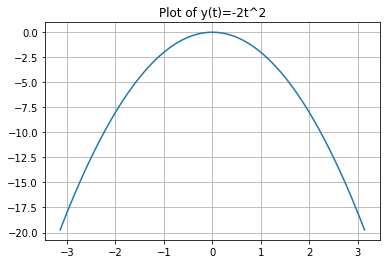

In [236]:
y_samples = []
t = np.linspace(-np.pi, np.pi, 100)
for i in range(0, len(t)):
    y_samples.append(-2*(t[i]**2))
    #y.append(-3*np.cos(t[i])**3 + np.sin(t[i])**4)

plt.title('Plot of y(t)=-2t^2')
plt.grid(True)
plt.plot(t, y_samples)

In [245]:
# Takes a function (sympy expression) y, a period T and the size of the series N
# Returns a Fourier series in symbolic values f
def fourier_series_symbolic(y, T, N):
    n = 0
    f = (2/T)*sp.integrate(y*sp.cos(0), (t, -T/2, T/2))/2    # a_0/2
    for n in range(1, N+1):
        a_n = (2/T)*sp.integrate(y*sp.cos((2*n*np.pi*t)/T), (t, -T/2, T/2))
        b_n = (2/T)*sp.integrate(y*sp.sin((2*n*np.pi*t)/T), (t, -T/2, T/2))
        f += a_n*sp.cos((2*n*np.pi*t)/T) + b_n*sp.sin((2*n*np.pi*t)/T)
        # sp.plot(f)
        
    return f


# Takes a Fourier series in symbolic values y, a period T and optionally the amount of samples
# Returns an array with time values, and an array with function values
def fourier_series_numeric(y, T, samples=64):
    func = []
    time = np.linspace(-T/2, T/2, samples)
    
    for i in range(0, time.size):
        func.append(float(y.evalf(subs={t: time[i]})))
    
    func = np.array(func)
    return time, func


# Demo function for reasons of lazyness
def fourier_series_demo(y, T, N):
    sp.init_printing()
    f_s = fourier_series_symbolic(y, T, N)
    
    #sp.plot(f_s)
    time, data = fourier_series_numeric(f_s, T, 100)

    plt.plot(time,data)
    plt.title("Fourier series for N = {}".format(N))
    plt.grid(True)
    plt.show()
    return sp.nsimplify(f_s, rational=True)
    

# Inefficient, over-engineered demo function
def ipython_fourier_series_demo(y, T, N):
    n = 0
    f = (2/T)*sp.integrate(y*sp.cos(0), (t, -T/2, T/2))/2    # a_0/2
    for n in range(1, N+1):
        a = (2/T)*sp.integrate(y*sp.cos((2*n*np.pi*t)/T), (t, -T/2, T/2))
        b = (2/T)*sp.integrate(y*sp.sin((2*n*np.pi*t)/T), (t, -T/2, T/2))
        f += a*sp.cos((2*n*np.pi*t)/T) + b*sp.sin((2*n*np.pi*t)/T)
        
        time, data = fourier_series_numeric(f, T, samples=100)
        
        clear_output(wait=True)
        #print(f)
        plt.plot(time,y_samples,time,data)
        plt.title("Fourier series for N = {}".format(n))
        plt.grid(True)
        plt.show()
        display(Math('f(t) = ' + sp.latex(sp.nsimplify(f, full=True, rational=True))))
        sleep(1)

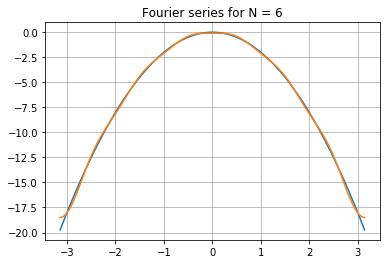

<IPython.core.display.Math object>

In [246]:
t = sp.symbols('t')
#y = -3*sp.cos(t)**3 + sp.sin(t)**4
y = -2*(t**2)
T = 2*np.pi
ipython_fourier_series_demo(y, T, N=6)

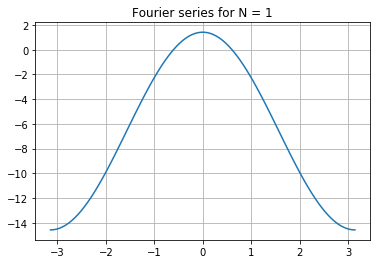

In [239]:
fourier_series_demo(y, T, N=1)

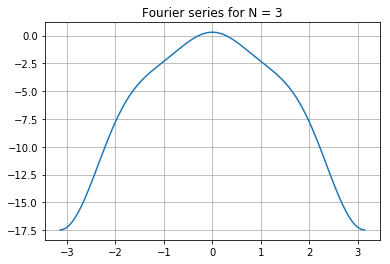

In [240]:
fourier_series_demo(y,T,N=3)

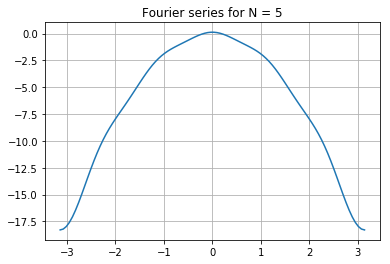

In [241]:
fourier_series_demo(y,T,N=5)

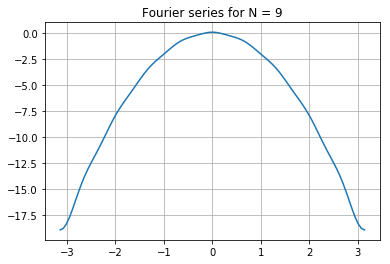

In [242]:
fourier_series_demo(y,T,N=9)

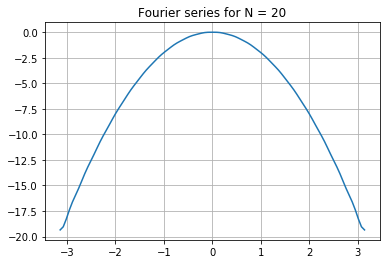

In [243]:
fourier_series_demo(y,T,N=20)

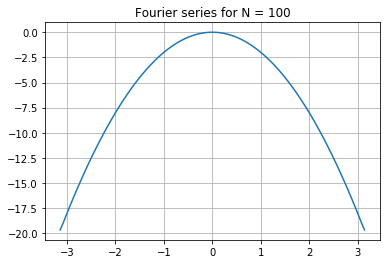

In [244]:
fourier_series_demo(y,T,N=100)